In [1]:
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

### add polynomial feature

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [3]:
X_poly[0]

array([-0.75275929,  0.56664654])

##### run poly with linear reg

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

### example of underfitting with cross val and rmse plot

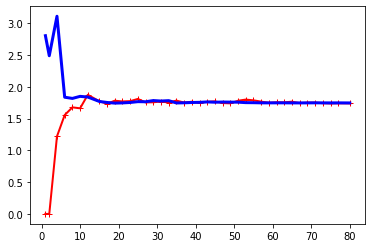

In [6]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, valid_scores = learning_curve(
LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

### overfitting with 10 degree polynomial feature

In [9]:
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(
PolynomialFeatures(degree=10, include_bias=False),
LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve(
polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")

![overfitting](2.png)

### Hint
There is a gap between the curves. This means that the model performs significantly better on the
training data than on the validation data, which is the hallmark of an overfitting model. If you used a
much larger training set, however, the two curves would continue to get closer.